
# **Shortest Path Problem**

This notebook demonstrates how to solve the shortest path problem using variational mechanics.

---

### **Problem Setup**

We want to find the path \( y(x) \) between two points that minimizes the total distance traveled. The length of a curve in Cartesian coordinates is given by:
\[
J[y] = \int_a^b \sqrt{1 + \left( y'(x) \right)^2} dx
\]

---

### **Steps to Solve**

1. Derive the governing equation using the **Euler-Lagrange equation**:
   \[
   \frac{\partial F}{\partial y} - \frac{d}{dx} \left( \frac{\partial F}{\partial y'} \right) = 0
   \]
   where \( F = \sqrt{1 + \left( y' \right)^2} \).

2. Solve the resulting ODE numerically using a C++ solver:
   \[
   \frac{d}{dx} \left( \frac{y'}{\sqrt{1 + \left( y' \right)^2}} \right) = 0
   \]

3. Visualize the solution \( y(x) \).

---

### **Boundary Conditions**

Let:
- Start point: \( (x_0, y_0) = (0, 0) \)
- End point: \( (x_1, y_1) = (1, 1) \)

We expect the solution to be a straight line:
\[
y(x) = x
\]


In [20]:
import os
import sys
from pathlib import Path

# change working directory
os.chdir("/home/turing/MechanicsSphere")
print("Updated Working Directory:", os.getcwd())

# Add src to path
src_path = Path("src")
sys.path.append(str(src_path))

# Verify new path
print("Updated Python Path:", sys.path)

# Import the symbolic solver from the src folder
from symbolic_solver import euler_lagrange
import sympy as sp


Updated Working Directory: /home/turing/MechanicsSphere
Updated Python Path: ['/usr/lib/python312.zip', '/usr/lib/python3.12', '/usr/lib/python3.12/lib-dynload', '', '/home/turing/MechanicsSphere/mechanics_env/lib/python3.12/site-packages', '/home/turing/MechanicsSphere/src', 'src', 'src']


In [21]:
# Define variables and the functional
x = sp.Symbol('x')  # Independent variable
y = sp.Function('y')(x)  # Dependent variable
functional = sp.sqrt(1 + sp.diff(y, x)**2)  # Arc length functional

# Derive the Euler-Lagrange equation
euler_eq = euler_lagrange(functional, y, x, save_to_file=True)

# Display the EL  equation
print(f"Euler-Lagrange Equation: {euler_eq}")

Euler-Lagrange equation saved to euler_lagrande_output.txt
Euler-Lagrange Equation: -Derivative(y(x), (x, 2))/(Derivative(y(x), x)**2 + 1)**(3/2)


### Running the C++ Solver

The Euler-Lagrange equation simplifies to \( y' = \text{constant} \), which can be solved numerically as a straight-line equation using the C++ solver.

Below, we:
1. Compile the C++ code located in `src/numerical_solver.cpp`.
2. Run the compiled executable to generate the numerical solution.
3. Save the results to `shortest_path_solution.csv`.


In [17]:
import subprocess

# Compile the C++ code
compile_result = subprocess.run(["g++", "-o", "src/numerical_solver", "src/numerical_solver.cpp"])
if compile_result.returncode == 0:
    print("C++ solver compiled successfully.")
else:
    print("Error during compilation. Check src/numerical_solver.cpp")

# Run the compiled executable
try:
    run_result = subprocess.run(["./src/numerical_solver"], check=True)
    print("C++ solver executed successfully.")
except subprocess.CalledProcessError as e:
    print(f"Error during execution: {e}")


C++ solver compiled successfully.
Solution saved to shortest_path_solution.csv
C++ solver executed successfully.


In [18]:
import pandas as pd

# Path to the output CSV file
file_path = "src/shortest_path_solution.csv"

# Load the solution into a Pandas DataFrame
try:
    data = pd.read_csv(file_path)
    print("Numerical Solution (First 5 Rows):")
    print(data.head())  # Display the first few rows
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Ensure the solver outputs the file correctly.")


Numerical Solution (First 5 Rows):
      x     y
0  0.00  0.00
1  0.01  0.01
2  0.02  0.02
3  0.03  0.03
4  0.04  0.04


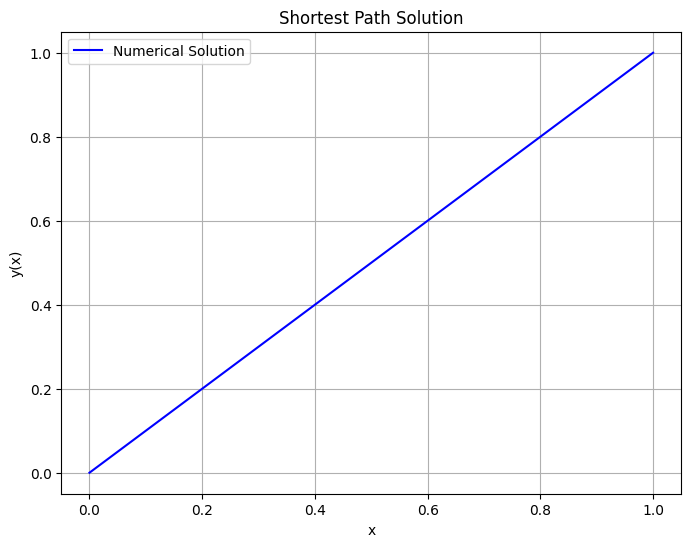

In [19]:
import matplotlib.pyplot as plt

# Plot the numerical solution
plt.figure(figsize=(8, 6))
plt.plot(data["x"], data["y"], label="Numerical Solution", color="blue")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.title("Shortest Path Solution")
plt.legend()
plt.grid()
plt.show()

### **Interpretation**

The numerical solution matches the expected analytical result: a straight line, \( y(x) = x \).

This confirms that the variational approach correctly solves the shortest path problem. The Euler-Lagrange equation derived from the functional produces a first-order ODE, which can be solved numerically using simple methods like Euler integration.
